In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

This script associates postcodes with local authority district codes (LAD) and merged LADs of 2011 which are used in the flow data do measure the distances from home to work.

In [2]:
# read in the constituency polygon boundaries for Great Britain into a GeoDataFrame:
gb_shape = gpd.read_file(
    'Census_Merged_Local_Authority_Districts_December_2011_Generalised_Clipped_Boundaries_in_Great_Britain.shp'
)

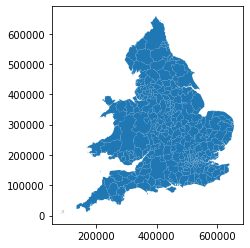

In [3]:
gb_shape.plot(); plt.show()

In [9]:
flow_df = pd.read_csv(
    "./wu01ew_mlad_level_2011.csv",
    skiprows=10,
    skipfooter=7,
    delimiter=',',
    delim_whitespace=False,
)
flow_df = flow_df.set_index('mlad_id')

m_lad_df = pd.read_csv(
    "./uk_local_authorities_merged_2011.csv",
    delimiter=',',
    delim_whitespace=False,
)
m_lad_df = m_lad_df.set_index('mlad_id')

flow_df = flow_df.merge(m_lad_df, left_index=True, right_index=True)
flow_df.to_csv("flow_in_mlad_lad.csv")
flow_df

<ipython-input-9-b248273bf6c3>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  flow_df = pd.read_csv(


,mlad_name,E41000001,E41000002,E41000003,E41000004,E41000005,E41000047,E41000048,E41000276,E41000277,...,W40000017,W40000018,W40000019,W40000020,W40000021,W40000022,Number,lad_id,LAD label,LAD name (Welsh label)
mlad_id,,,,,,,,,,,,,,,,,,,,,
E41000001,Hartlepool,20777,1591,534,3865,433,2269,47,173,310,...,28,0,0,0,0,0,1,E06000001,Hartlepool,NaN
E41000002,Middlesbrough,990,25474,5111,8889,1030,710,54,120,202,...,0,0,0,0,0,0,2,E06000002,Middlesbrough,NaN
E41000003,Redcar and Cleveland,558,10569,25106,5387,682,465,47,109,170,...,1,1,0,0,0,0,3,E06000003,Redcar and Cleveland,NaN
E41000004,Stockton-on-Tees,2590,10779,3652,44337,3317,2513,91,328,557,...,1,0,0,2,0,0,4,E06000004,Stockton-on-Tees,NaN
E41000005,Darlington,266,1300,467,3014,26671,4629,80,222,418,...,0,0,1,0,1,0,5,E06000005,Darlington,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W40000018,Torfaen,0,0,0,1,0,4,0,0,0,...,707,19660,2459,6064,163,94,374,W06000020,Torfaen,Tor-faen
W40000019,Monmouthshire,0,0,0,0,0,3,2,1,2,...,739,2289,15266,3985,580,147,375,W06000021,Monmouthshire,Sir Fynwy
W40000020,Newport,0,0,0,2,0,4,10,1,0,...,209,3999,1803,34375,40,87,376,W06000022,Newport,Casnewydd


In [10]:
pcd_lda_dir = "/home/christovis/PhD/5_COVID_19/"
pcd_lda_df = pd.read_csv(
    pcd_lda_dir+"pcd11_par11_wd11_lad11_ew_lu.csv",
    delimiter=',',
    delim_whitespace=False,
    encoding = "ISO-8859-1",
)
pcd_lda_df = pcd_lda_df.drop(columns=["pcd7", "pcd8", "par11cd", "par11nm", "par11nmw"])
pcd_lda_df = pcd_lda_df.set_index('pcds')

pcd_dir = "../postcode/"
pcd_df = pd.read_csv(
    pcd_dir+"uk_postcode_population.csv",
    delimiter=',',
    delim_whitespace=False,
    #encoding = "ISO-8859-1",
)
pcd_df = pcd_df.set_index('Postcode')

pcd_df = pcd_df.merge(pcd_lda_df, left_index=True, right_index=True)
pcd_df.to_csv("postcodes_in_mlad_lad.csv")
pcd_df

/home/christovis/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Total,Occupied_Households,wd11cd,wd11nm,wd11nmw,lad11cd,lad11nm,lad11nmw
AL1 1AG,14,6,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
AL1 1AJ,124,51,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
AL1 1AR,32,17,E05004789,Cunningham,NaN,E07000100,St Albans,NaN
AL1 1AS,34,13,E05004799,St Peters,NaN,E07000100,St Albans,NaN
AL1 1BH,52,41,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
...,...,...,...,...,...,...,...,...
YO8 9YA,23,8,E05006349,Hambleton,NaN,E07000169,Selby,NaN
YO8 9YB,33,13,E05006349,Hambleton,NaN,E07000169,Selby,NaN
YO8 9YD,9,4,E05006349,Hambleton,NaN,E07000169,Selby,NaN
YO8 9YE,13,3,E05006349,Hambleton,NaN,E07000169,Selby,NaN


In [8]:
flow_df[flow_df["lad_id"] == "E07000100"]

,mlad_name,E41000001,E41000002,E41000003,E41000004,E41000005,E41000047,E41000048,E41000276,E41000277,...,W40000017,W40000018,W40000019,W40000020,W40000021,W40000022,Number,lad_id,LAD label,LAD name (Welsh label)
mlad_id,,,,,,,,,,,,,,,,,,,,,
E41000132,St Albans,2,2,0,0,2,14,0,2,4,...,1,0,2,1,2,0,131,E07000100,St Albans,NaN
